In [1]:
import geatpy as ga
import numpy as np
import glovar as glo
import get_v_field_function as gvf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset, date2index
from netCDF4 import num2date
from netCDF4 import date2num
import os
from pydap.client import open_url
import pprint
import seawater as sw
import sys
from scipy.integrate import odeint
import time as tm
from moea_nsga2_templet1 import moea_nsga2_templet1
#读取流场数据库   
dataset_uvel =Dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/ECCO/ECCO2/cube92/uvel')
dataset_vvel =Dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/ECCO/ECCO2/cube92/vvel')    #打开数据文件
u=dataset_uvel.variables['uvel']
v=dataset_vvel.variables['vvel']
time=dataset_uvel.variables['time']
lat_f=np.array(dataset_uvel.variables['lat'])
lon_f=np.array(dataset_uvel.variables['lon'])


In [34]:
glo.track_n=4
#------------画图用
vx=gvf.get_vel_field(glo.track_n,1)
vy=gvf.get_vel_field(glo.track_n,0)
    #获取坐标的数组范围
loc_range=gvf.L_to_location(glo.track_n)
    #生成网格

————————————————获取速度场————————————————
涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.2553427832467 286.0686318261283
对应坐标起止lat: 31.375 33.625  lon: 284.125 286.125
对应数组起止lat:  485 494  lon: 1136 1144

选择了中尺度涡数据库的Julian时间为 2448989.0 转换后为 727200.0 
对应流场观测的时间点为 727200.0 数组索引为 0
———————————————获取速度U完毕————————————————


————————————————获取速度场————————————————
涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.2553427832467 286.0686318261283
对应坐标起止lat: 31.375 33.625  lon: 284.125 286.125
对应数组起止lat:  485 494  lon: 1136 1144

选择了中尺度涡数据库的Julian时间为 2448989.0 转换后为 727200.0 
对应流场观测的时间点为 727200.0 数组索引为 0
———————————————获取速度V完毕————————————————


涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43

涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.2553427832467 286.0686318261283
对应坐标起止lat: 31.375 33.625  lon: 284.125 286.125
对应数组起止lat:  485 494  lon: 1136 1144
涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.2553427832467 286.0686318261283
对应坐标起止lat: 31.375 33.625  lon: 284.125 286.125
对应数组起止lat:  485 494  lon: 1136 1144
涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.2553427832467 286.0686318261283
对应坐标起止lat: 31.375 33.625  lon: 284.125 286.125
对应数组起止lat:  485 494  lon: 1136 1144
涡心坐标    lat： 32.52479934692383 lon： 285.1619873046875
半径L= 101.5441864013672 转换为度数： 0.9066445214407786
涡的坐标范围lat:  31.61815482548305 33.43144386836461  lon: 284.25534278324

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.66it/s]


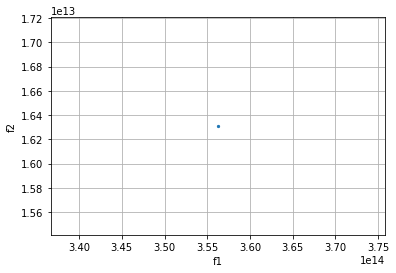

In [35]:

# 获取函数接口地址
AIM_M = __import__('aimfuc')
PUN_M = __import__('punishing')
"""============================变量设置============================"""
ox = [gvf.L_to_location(glo.track_n)[4],gvf.L_to_location(glo.track_n)[5]]  # 自变量1的范围  lon的范围
oy = [gvf.L_to_location(glo.track_n)[6],gvf.L_to_location(glo.track_n)[7]]  # 自变量2的范围    lat的范围
"""#完整参数
R = [0.1,4 ]  # 自变量3的范围
alfa = [-3, 3]  # 自变量3的范围
beta = [-3, 3]  # 自变量3的范围
a = [1, 4]  # 自变量3的范围
b = [1, 4]  # 自变量3的范围
lamda = [0.1, 10]  # 自变量3的范围
mu = [0.1, 10]  # 自变量3的范围
b1 = [1, 1]  # 自变量1是否包含下界
b2 = [1, 1]  # 自变量2是否包含上界
b3 = [1, 1]  # 自变量3是否包含下界
b4 = [1, 1]  # 自变量4是否包含上界
b5 = [1, 1]  # 自变量4是否包含上界
b6 = [1, 1]  # 自变量4是否包含上界
b7 = [1, 1]  # 自变量4是否包含上界
b8 = [1, 1]  # 自变量4是否包含上界
b9 = [1, 1]  # 自变量4是否包含上界
precisions = [1, 1]  # 在二进制/格雷码编码中代表自变量的编码精度，当控制变量是二进制/格雷编码时，该参数可控制编码的精度
ranges = np.vstack([ox,oy,R,alfa,beta,a,b,lamda,mu]).T  # 生成自变量的范围矩阵
borders = np.vstack([b1,b2,b3,b4,b5,b6,b7,b8,b9]).T  # 生成自变量的边界矩阵"""

#简化参数
C = [-10,-0.1]  # 自变量3的范围
R = [0.1,4]  # 自变量3的范围
b1 = [1, 1]  # 自变量1是否包含下界
b2 = [1, 1]  # 自变量2是否包含上界
b3 = [1, 1]  # 自变量3是否包含下界
b4 = [1, 1]  # 自变量4是否包含上界
precisions = [1, 1]  # 在二进制/格雷码编码中代表自变量的编码精度，当控制变量是二进制/格雷编码时，该参数可控制编码的精度
ranges = np.vstack([ox,oy,C,R]).T  # 生成自变量的范围矩阵
borders = np.vstack([b1,b2,b3,b4]).T  # 生成自变量的边界矩阵

# 生成区域描述器
FieldD = ga.crtfld(ranges, borders, precisions)
"""========================遗传算法参数设置========================="""
NIND = 100  # 种群规模
MAXGEN = 2000  # 最大遗传代数
MAXSIZE = 200  # 最大帕累托前沿数
GGAP = 0.8  # 代沟：子代与父代的重复率为(1-GGAP)
selectStyle = 'rws'  # 遗传算法的选择方式设为"rws"——轮盘赌选择
recombinStyle = 'xovdp'  # 遗传算法的重组方式，设为两点交叉
recopt = 0.9  # 交叉概率
pm = 0.1  # 变异概率
SUBPOP = 1  # 设置种群数为1
maxormin = 1  # 设置标记表明这是最小化目标
"""=======================调用编程模板进行种群进化==================="""
# 调用编程模板进行种群进化，得到种群进化和变量的追踪器以及运行时间
[ObjV, NDSet, NDSetObjV, times] = moea_nsga2_templet1(AIM_M=AIM_M, AIM_F="aimfuc", PUN_M=PUN_M, PUN_F="punishing",
                                                        FieldDR=FieldD, problem="R", maxormin=1, MAXGEN=MAXGEN,
                                                        MAXSIZE=MAXSIZE, NIND=NIND, SUBPOP=SUBPOP, GGAP=GGAP,
                                                        selectStyle=selectStyle, recombinStyle=recombinStyle,
                                                        recopt=recopt, pm=pm, distribute=True, drawing=1)


In [36]:
index_output=np.where((NDSetObjV[:,0]/NDSetObjV[:,1]<1.2)&(NDSetObjV[:,0]/NDSetObjV[:,1]>0.8))
print('涡心为：   lon:',np.mean(NDSet[:,0]),
                            'lat:',np.mean(NDSet[:,1]),
                            '\nC:',np.mean(NDSet[:,2]),
                            '\nR:',np.mean(NDSet[:,3]))
print('涡心为：   lon:',np.mean(NDSet[index_output,0]),
                            'lat:',np.mean(NDSet[index_output,1]),
                            '\nC:',np.mean(NDSet[index_output,2]),
                            '\nR:',np.mean(NDSet[index_output,3]))

涡心为：   lon: 284.0 lat: 31.0 
C: -10.0 
R: 4.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


涡心为：   lon: nan lat: nan 
C: nan 
R: nan


In [37]:
from pylab import *
"""#完整参数
ox = np.mean(NDSet[index_output,0])
oy = np.mean(NDSet[index_output,1])
R = np.mean(NDSet[index_output,2])
alfa = np.mean(NDSet[index_output,3])
beta = np.mean(NDSet[index_output,4])
a = np.mean(NDSet[index_output,5])
b = np.mean(NDSet[index_output,6])
lamda = np.mean(NDSet[index_output,7])
mu = np.mean(NDSet[index_output,8])"""
#简化参数

"""ox = np.mean(NDSet[index_output,0])
oy = np.mean(NDSet[index_output,1])
C = np.mean(NDSet[index_output,2])
R = np.mean(NDSet[index_output,3])"""
ox = 284.84
oy = 31.78
R = 0.23
alfa = 0.2
beta = 0.46
a = 1.01
b = 1
lamda = 0.1
mu = 0.1
def dmove(Point,t):
    """
    p：位置矢量
    sets：其他参数
    """
    x,y = Point
    #完整参数
    y1=(lamda*(y-oy)+alfa*(x-ox)*(a*(x-ox)**2+b*(y-oy)**2-R)**2)
    y2=(-mu*(x-ox)+beta*(y-oy)*(a*(x-ox)**2+b*(y-oy)**2-R)**2)
    """#简化参数
    y1=((y-oy)+(x-ox)*((x-ox)**2+(y-oy)**2-R)**2)/C
    y2=(-(x-ox)+(y-oy)*((x-ox)**2+(y-oy)**2-R)**2)/C"""
    return np.array([y1,y2])


t = np.arange(0,2000,0.001)
#调用odeint对dmove进行求解，用两个不同的初始值
#P1 = odeint(dmove,(ox+R**0.5+0.1,oy),t)  #(0.,1.,0.)是point的初值
P2 = odeint(dmove,(ox+R**0.5-0.001,oy),t)  #(0.,1.,0.)是point的初值


————————网格生成成功，大小为： (9, 8) ————————

————————绘图完毕————————
绘制png
绘制eps


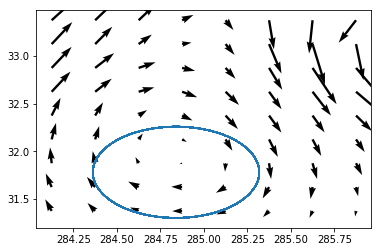

In [38]:

X,Y=np.meshgrid(lon_f[loc_range[0]:loc_range[1]],lat_f[loc_range[2]:loc_range[3]])  #参见函数L_to_location
    
print('\n————————网格生成成功，大小为：',X.shape,'————————')
    
fig, ax = plt.subplots()
q = ax.quiver(X, Y, vx, vy)
#ax.plot(P1[:,0],P1[:,1])
ax.plot(P2[:,0],P2[:,1])
print('\n————————绘图完毕————————')
foo_fig = plt.gcf() # 'get current figure'
print("绘制png")
plt.savefig('result.png')#, format='png', dpi=1000)
print("绘制eps")
foo_fig.savefig('result.eps', format='eps', dpi=1000)
plt.show()